<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Get-the-data-of-Top-Rated-Movies-from-the-IMDb-site" data-toc-modified-id="Get-the-data-of-Top-Rated-Movies-from-the-IMDb-site-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Get the data of Top Rated Movies from the IMDb site</a></span></li><li><span><a href="#Create-a-data-frame-with-the-movies" data-toc-modified-id="Create-a-data-frame-with-the-movies-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Create a data frame with the movies</a></span></li><li><span><a href="#Prepare-data" data-toc-modified-id="Prepare-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Prepare data</a></span><ul class="toc-item"><li><span><a href="#Statistical-analysis" data-toc-modified-id="Statistical-analysis-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Statistical analysis</a></span></li></ul></li><li><span><a href="#Answer-the-questions" data-toc-modified-id="Answer-the-questions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Answer the questions</a></span><ul class="toc-item"><li><span><a href="#Budget-&amp;-rate-correlation?" data-toc-modified-id="Budget-&amp;-rate-correlation?-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Budget &amp; rate correlation?</a></span></li><li><span><a href="#Decades-analysis" data-toc-modified-id="Decades-analysis-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Decades analysis</a></span></li><li><span><a href="#Directors-analysis" data-toc-modified-id="Directors-analysis-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Directors analysis</a></span></li><li><span><a href="#Genre-analysis" data-toc-modified-id="Genre-analysis-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Genre analysis</a></span></li></ul></li><li><span><a href="#Rate-prediction-with-log-regression" data-toc-modified-id="Rate-prediction-with-log-regression-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Rate prediction with log regression</a></span><ul class="toc-item"><li><span><a href="#Prepare-data--set-for-the-model" data-toc-modified-id="Prepare-data--set-for-the-model-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Prepare data  set for the model</a></span></li><li><span><a href="#Tain/Test-data-set" data-toc-modified-id="Tain/Test-data-set-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Tain/Test data set</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Modeling</a></span></li></ul></li></ul></div>

In [1]:
import requests
from bs4 import BeautifulSoup as soup
import pandas as pd
from urllib.request import urlopen as uReq
import matplotlib.pyplot  as plt
import seaborn as sns

In [1]:

from viz import ImdbViz

In [2]:
view = ImdbViz()



## Prepare data

In [8]:
IMDb_Top250[[len(i) > 2
             for i in IMDb_Top250["directors"]]].sort_values('rate',
                                                             ascending=False)

,title,year,rate,votes,gross,directors,duration,genre
41,Spider-Man: New Generation,2018,8.4,407154,190241310,"[Bob Persichetti, Peter Ramsey, Rodney Rothman]",117,"[Animation, Action, Adventure]"
180,Tumbbad,2018,8.3,33483,None,"[Rahi Anil Barve, Anand Gandhi, Adesh Prasad]",104,"[Drama, Fantasy, Horror]"
117,Monstres & Cie,2001,8.1,834837,289916256,"[Pete Docter, David Silverman, Lee Unkrich]",92,"[Animation, Adventure, Comedy]"
126,Autant en emporte le vent,1939,8.1,295728,198676459,"[Victor Fleming, George Cukor, Sam Wood]",238,"[Drama, History, Romance]"


In [9]:
IMDb_Top250[IMDb_Top250['gross'].isna()].sort_values('year')

,title,year,rate,votes,gross,directors,duration,genre
241,Jeux dangereux,1942,8.2,31994,None,[Ernst Lubitsch],99,"[Comedy, Romance, War]"
162,La vie est belle,1946,8.6,414344,None,[Frank Capra],130,"[Drama, Family, Fantasy]"
190,Boulevard du Crépuscule,1950,8.4,206425,None,[Billy Wilder],110,"[Drama, Film-Noir]"
242,Voyage à Tokyo,1953,8.2,55443,None,[Yasujirô Ozu],136,[Drama]
240,Le salaire de la peur,1953,8.1,56251,None,[Henri-Georges Clouzot],156,"[Adventure, Drama, Thriller]"
206,Les sentiers de la gloire,1957,8.4,183061,None,[Stanley Kubrick],88,"[Drama, War]"
235,Les fraises sauvages,1957,8.2,99315,None,[Ingmar Bergman],91,"[Drama, Romance]"
187,Le septième sceau,1957,8.2,170039,None,[Ingmar Bergman],96,"[Drama, Fantasy, History]"
232,Les Quatre Cents Coups,1959,8.1,108656,None,[François Truffaut],99,"[Crime, Drama]"
211,Jugement à Nuremberg,1961,8.2,71632,None,[Stanley Kramer],179,"[Drama, War]"


In [10]:
IMDb_Top250.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      250 non-null    object
 1   year       250 non-null    object
 2   rate       250 non-null    object
 3   votes      250 non-null    object
 4   gross      213 non-null    object
 5   directors  250 non-null    object
 6   duration   250 non-null    object
 7   genre      250 non-null    object
dtypes: object(8)
memory usage: 17.6+ KB


In [11]:
features = IMDb_Top250.columns
numerical_features = ['year', 'rate', 'votes', 'gross', 'duration']
categorical_features = ['title', 'directors', 'genre']
#print(features)

In [13]:
for f in numerical_features:
    IMDb_Top250[f] = IMDb_Top250[f].astype('float')
IMDb_Top250['year'] = IMDb_Top250['year'].astype('int')

In [13]:
IMDb_Top250.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 0 to 250
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      251 non-null    object 
 1   year       251 non-null    int64  
 2   rate       251 non-null    float64
 3   votes      251 non-null    float64
 4   gross      216 non-null    float64
 5   directors  251 non-null    object 
 6   duration   251 non-null    float64
 7   genre      251 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 17.6+ KB


### Statistical analysis

[Text(0.5, 0, 'year'),
 Text(1.5, 0, 'rate'),
 Text(2.5, 0, 'votes'),
 Text(3.5, 0, 'gross'),
 Text(4.5, 0, 'duration')]

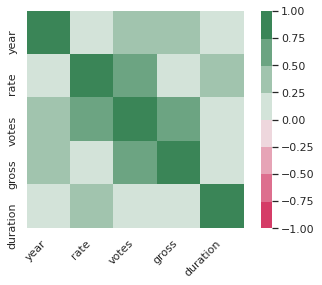

In [15]:
corr = IMDb_Top250[numerical_features].corr()
ax = sns.heatmap(corr,
                 vmin=-1,
                 vmax=1,
                 center=0,
                 cmap=sns.diverging_palette(1, 500, n=8),
                 square=True)
ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45,
                   horizontalalignment='right')

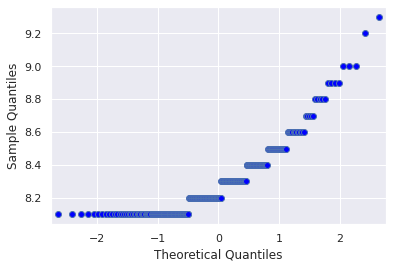

In [16]:
import statsmodels.api as sm

sm.qqplot(IMDb_Top250['rate'])
plt.show()

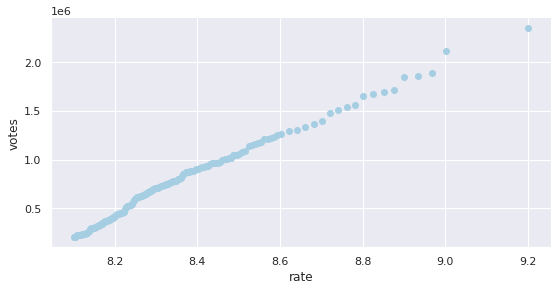

In [17]:
#!pip install seaborn_qqplot
from seaborn_qqplot import pplot
pplot(IMDb_Top250, x="rate", y="votes", kind='qq',height=4, aspect=2)

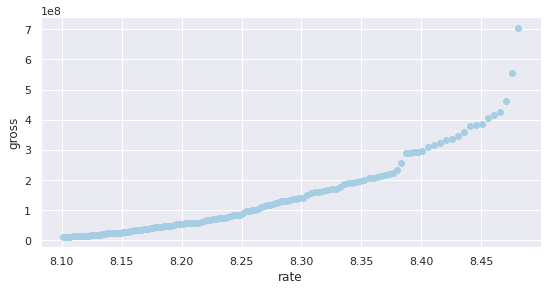

In [18]:
pplot(IMDb_Top250, x="rate", y="gross", kind='qq',height=4, aspect=2)

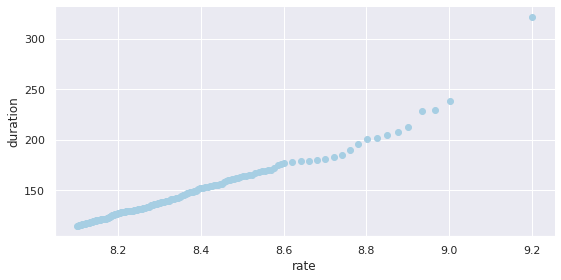

In [19]:
pplot(IMDb_Top250, x='rate', y="duration", kind='qq',height=4, aspect=2) 

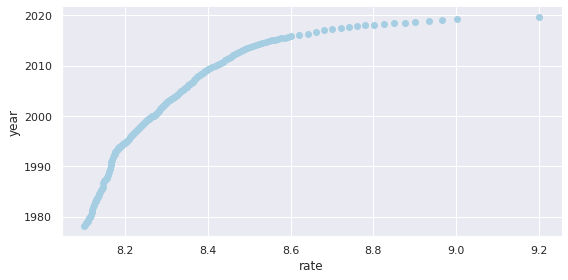

In [20]:
pplot(IMDb_Top250, x="rate", y="year", kind='qq',height=4, aspect=2)

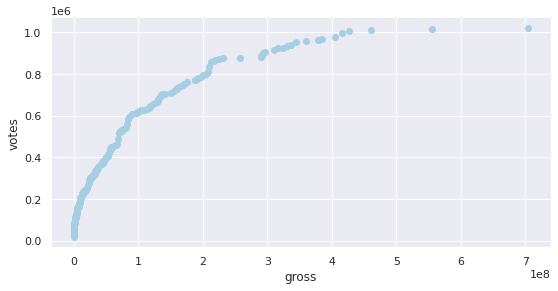

In [21]:
pplot(IMDb_Top250, x="gross", y="votes", kind='qq',height=4, aspect=2)

## Answer the questions

Posez vous des questions et répondez-y en manipulant et visualisant la donnée via pandas, matplotlib ou searborn. 

Exemples : 
- Il y a t-il une correlation entre le nombre de stars et le recette ? 
- Quel est le nombre de film par année ? 
- Quel est le réalisateur le mieux noté ? etc...


<AxesSubplot:xlabel='rate', ylabel='gross'>

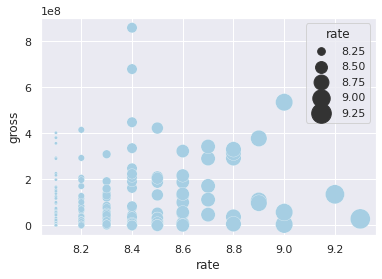

In [22]:
import seaborn as sns

sns.scatterplot(data=IMDb_Top250, x='rate', y='gross', size='rate', legend=True, sizes=(10, 400))

In [23]:
['titre, ''rate', 'nombre_de_votes', 'recette', 'année', 'realisateur']

['titre, rate', 'nombre_de_votes', 'recette', 'année', 'realisateur']

### Budget & rate correlation?

   rate  gross
0   8.1     67
1   8.2     40
2   8.3     36
3   8.4     26
4   8.5     18
5   8.6     11
6   8.7      5
7   8.8      5
8   8.9      3
9   9.0      3


Text(0.5, 1.0, 'Rate and avg gross by rate correlation')

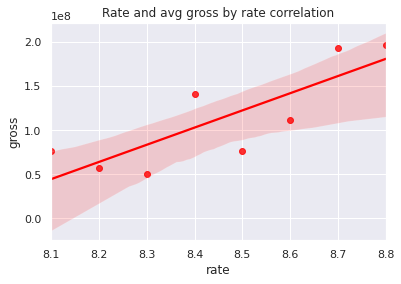

In [26]:
group_gross_rate = IMDb_Top250[['rate', 'gross']].groupby(by='rate',
                                                          sort=True,
                                                          as_index=False)
print(group_gross_rate.gross.count().head(10))

df = group_gross_rate.gross.mean()

sns.regplot(data=df[df.rate < 8.9], x='rate', y='gross', color='red')
plt.title("Rate and avg gross by rate correlation")

<AxesSubplot:xlabel='rate', ylabel='gross'>

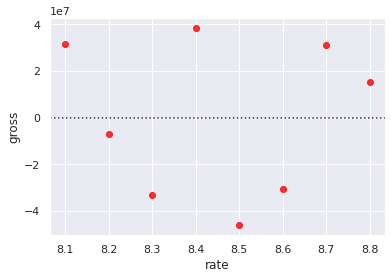

In [27]:
sns.residplot(data=df[df.rate < 8.9], x='rate', y='gross', color='red')

<AxesSubplot:title={'center':'The number of movies by rate'}, xlabel='rate'>

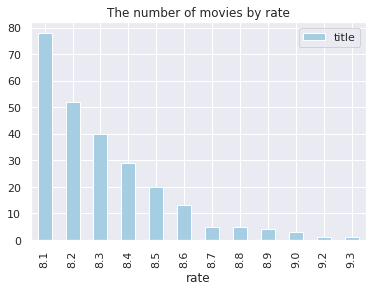

In [28]:
IMDb_Top250[['title', 'rate']].groupby('rate').count().plot(
    kind='bar', title='The number of movies by rate')

### Decades analysis

In [29]:
#number of bins by decade
bin_min = IMDb_Top250.year.min() // 10
bin_max = IMDb_Top250.year.max() // 10 + 1
bins = [10 * i - 1 for i in range(bin_min, bin_max + 1)]
group_names = [int(b + 1) for b in bins]

IMDb_Top250['decade'] = pd.cut(IMDb_Top250['year'],
                                bins,
                                labels=group_names[:-1],
                                include_lowest=True)

decade_rate = IMDb_Top250[['decade', 'rate',
                            'gross']].groupby(by='decade',
                                                sort=True,
                                                as_index=False).mean()
print(decade_rate.head(20))
print("""
Correlation average rate by decade with time   = {}
Correlation average budget by decade with time = {}
""".format(decade_rate.rate.corr(decade_rate.decade),
           decade_rate.gross.corr(decade_rate.decade)))

   decade      rate         gross
0    1920  8.200000  2.361552e+06
1    1930  8.266667  3.547463e+07
2    1940  8.300000  2.346849e+06
3    1950  8.278261  1.433139e+07
4    1960  8.305556  1.729602e+07
5    1970  8.347368  7.864391e+07
6    1980  8.267857  8.021483e+07
7    1990  8.400000  9.934542e+07
8    2000  8.300000  1.047128e+08
9    2010  8.262000  1.424995e+08
10   2020  8.300000           NaN

Correlation average rate by decade with time   = 0.4073936990895947
Correlation average budget by decade with time = 0.9196129474033965



Text(0.5, 1.0, 'Decade - gross correlation')

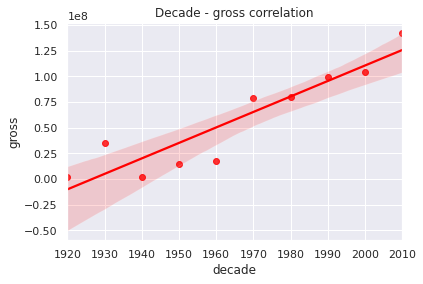

In [30]:
sns.regplot(data=decade_rate, x='decade', y='gross', color='red')
plt.title('Decade - gross correlation')

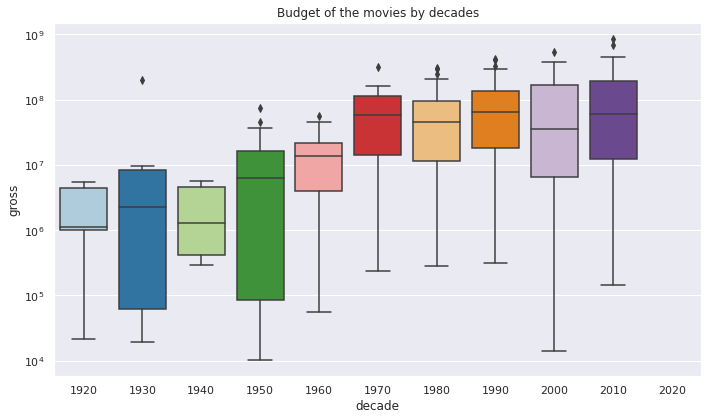

In [31]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(data = IMDb_Top250, x="decade", y="gross")
ax.set_yscale("log")
ax.set_title(f"Budget of the movies by decades")
plt.tight_layout()

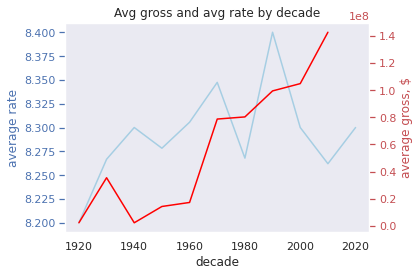

In [32]:
fig, ax1 = plt.subplots()

sns.lineplot(data = decade_rate, x = 'decade', y= 'rate', ax = ax1)
ax1.set_xlabel('decade')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('average rate', color='b')
ax1.tick_params('y', colors='b')
ax1.grid(b=None)

ax2 = ax1.twinx()

sns.lineplot(data = decade_rate, x = 'decade', y= 'gross', ax = ax2, color = 'red')
ax2.set_ylabel('average gross, $', color='r')
ax2.tick_params('y', colors='r')
ax2.grid(b=None)

plt.title('Avg gross and avg rate by decade')
fig.tight_layout()
plt.show()


### Directors analysis



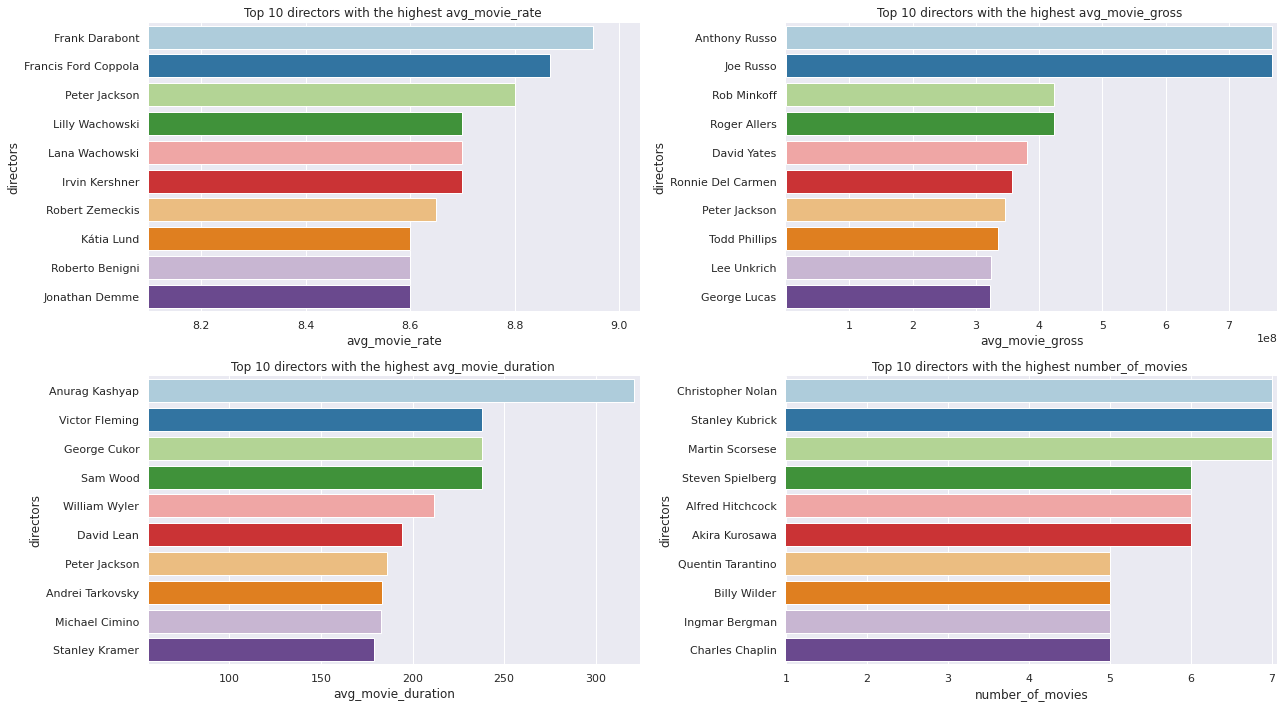

In [8]:
view.show_top_10_directors()

### Genre analysis

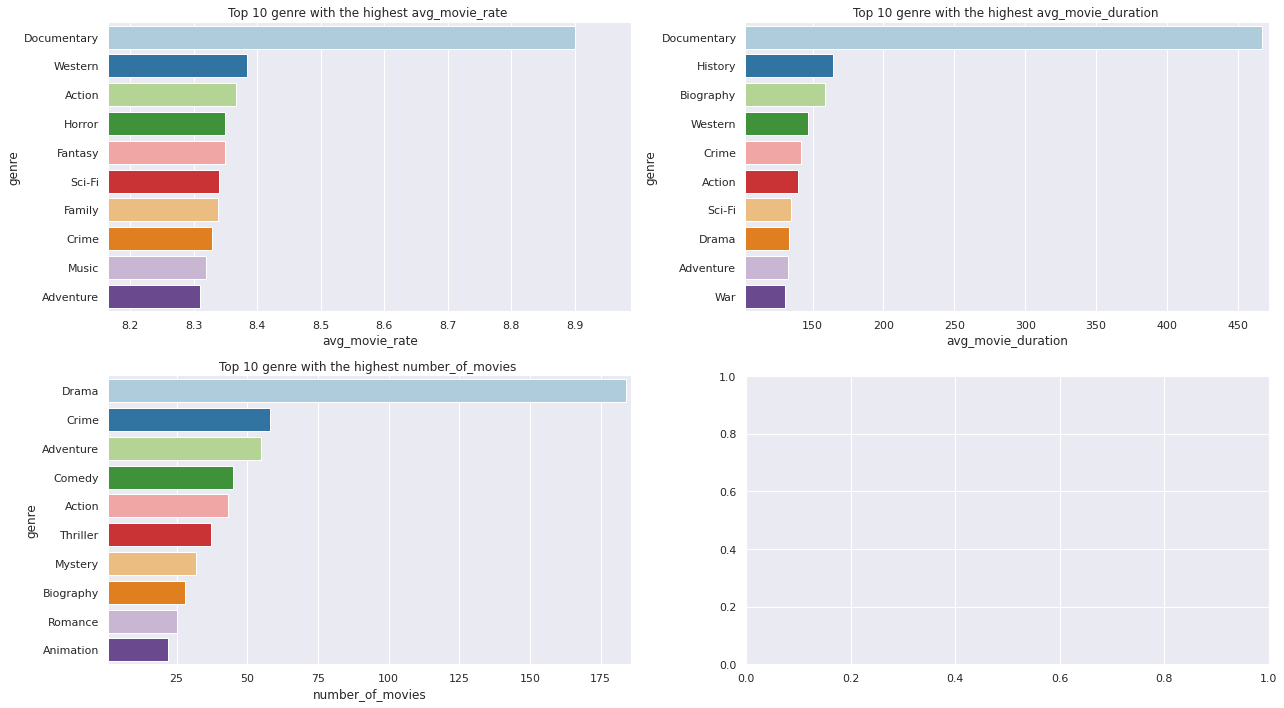

In [37]:
view.show_top_10_genres()

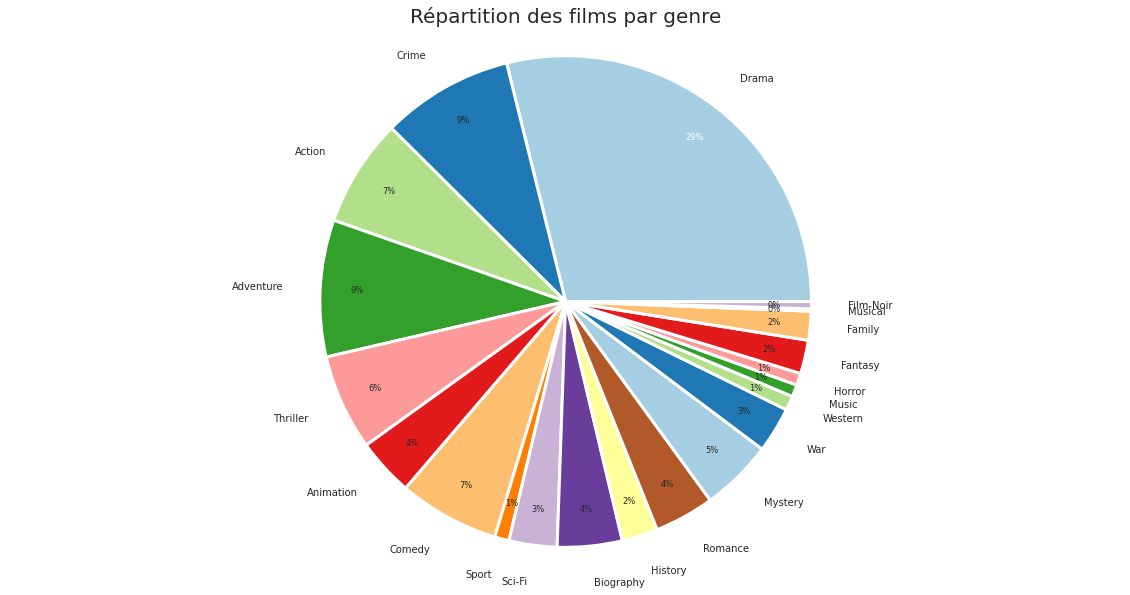

In [4]:
view.pieplot_genres()
